In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
STORAGE_PATH = "../../persisted_data/feather/{}.feather"

def load_data_set(name):
    data = pd.read_feather(STORAGE_PATH.format(name))
    return data

In [3]:
file_mask = "{}_10spy_30shift_normalized"
countries = ["spain", "brazil", "australia", "canada", "ireland", "usa", "germany", "latvia", "france", "denmark", 
             "isreal", "iceland", "switzerland", "finland", "southkorea", "mexiko", "hongkong", "argentina", 
             "italy", "russia", "thailand", "china", "lithuania", "turkey", "taiwan", "austria", "portugal", 
             "india", "greece", "estonia", "singapore", "norway", "newzealand", "belgium", "qatar", "sweden", 
             "uk", "malaysia", "venezuela", "indonesia", "netherlands"]

country_sets = {country : load_data_set(file_mask.format(country)) for country in countries}

In [4]:
country_correlations = {}

for country, data_set in country_sets.items():

    # calculate the correlations for a data set
    correlations = data_set.corrwith(np.log(data_set["future_price"]))

    # filter out the future columns
    future_columns = [column for column in data_set if "future" in column]
    correlations.drop(future_columns, inplace=True)
    correlations.drop("index", inplace=True)
    country_correlations[country] = correlations.to_dict()

In [5]:
def correlation_bar_chart(indicator):
    indicator_correlations = {country: correlations[indicator]
                              for country, correlations in country_correlations.items()
                             }
    largest_set_size = len(country_sets["usa"])
    factor = 1
    set_size = {country: factor * len(data_set) / largest_set_size
                for country, data_set in country_sets.items()
               }

    plt.figure(figsize=(15,10))
    plt.bar(indicator_correlations.keys(), indicator_correlations.values()), list(set_size.values())
    plt.xticks(rotation='vertical')

    plt.show()

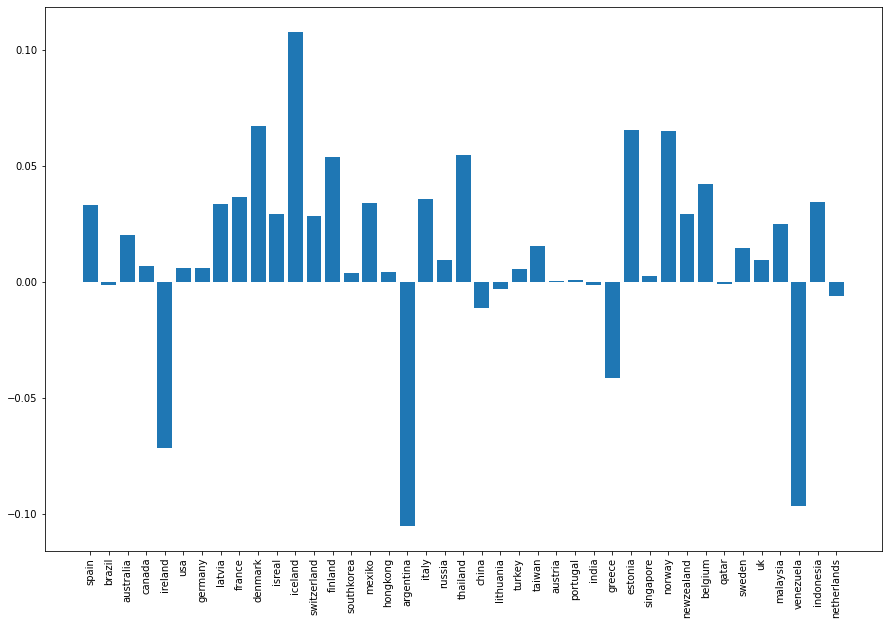

In [6]:
correlation_bar_chart("horizontal_position100")

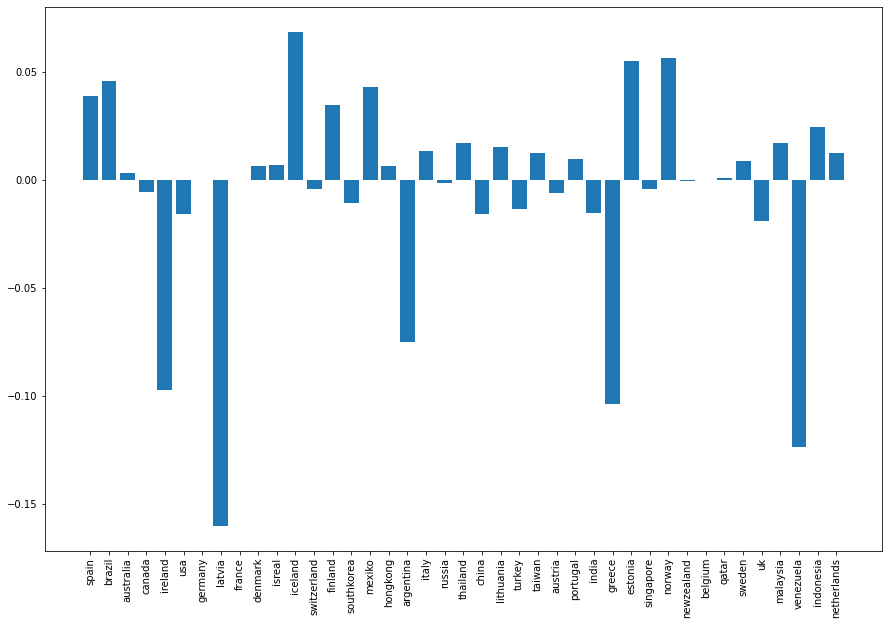

In [7]:
correlation_bar_chart("bollinger_position20_2")

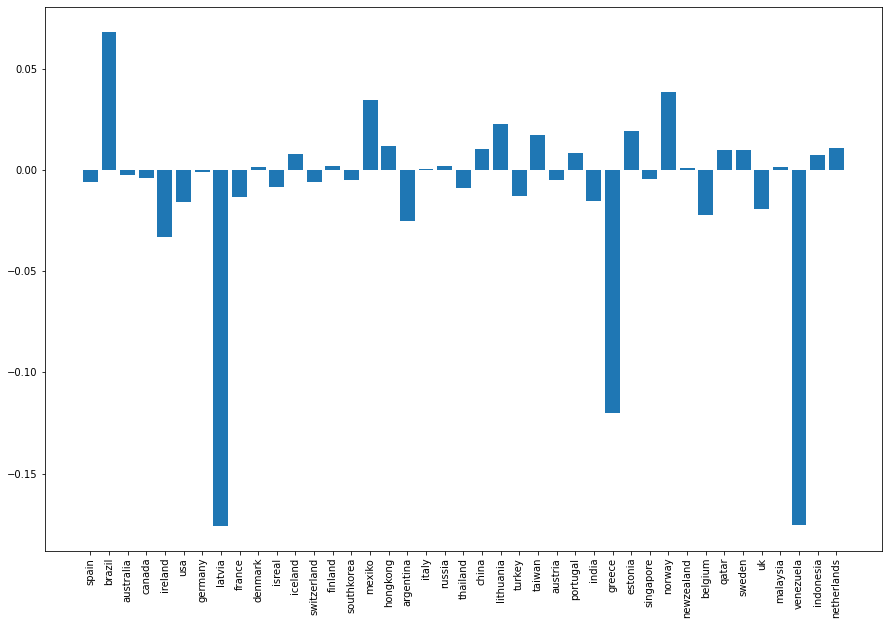

In [8]:
correlation_bar_chart("regression_position50")

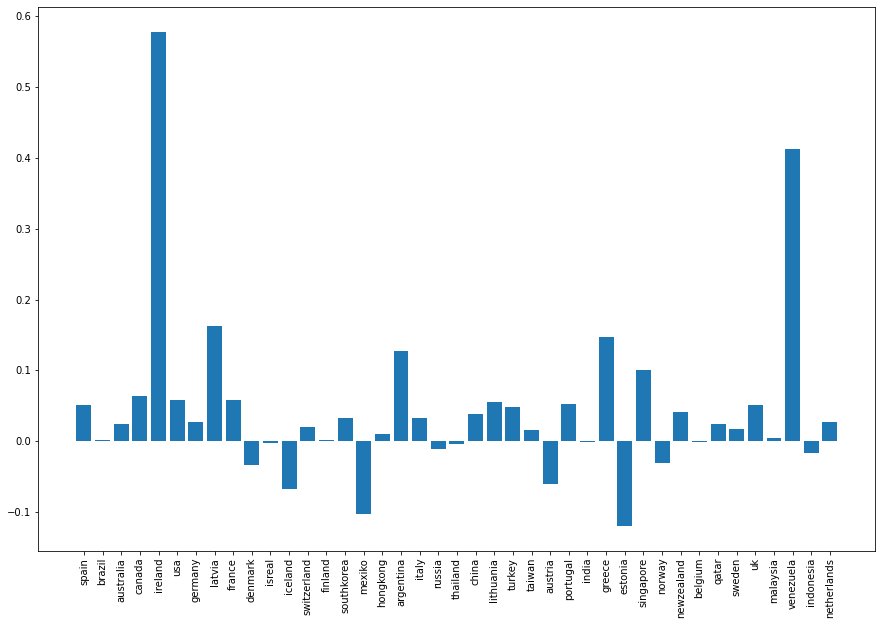

In [9]:
correlation_bar_chart("ema10")

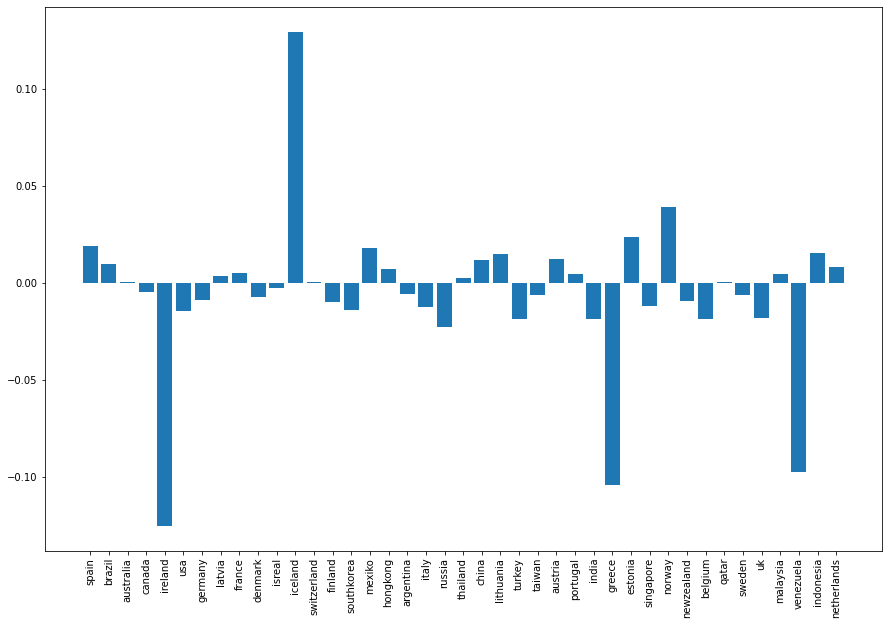

In [10]:
correlation_bar_chart("bollinger_threshold50_2")

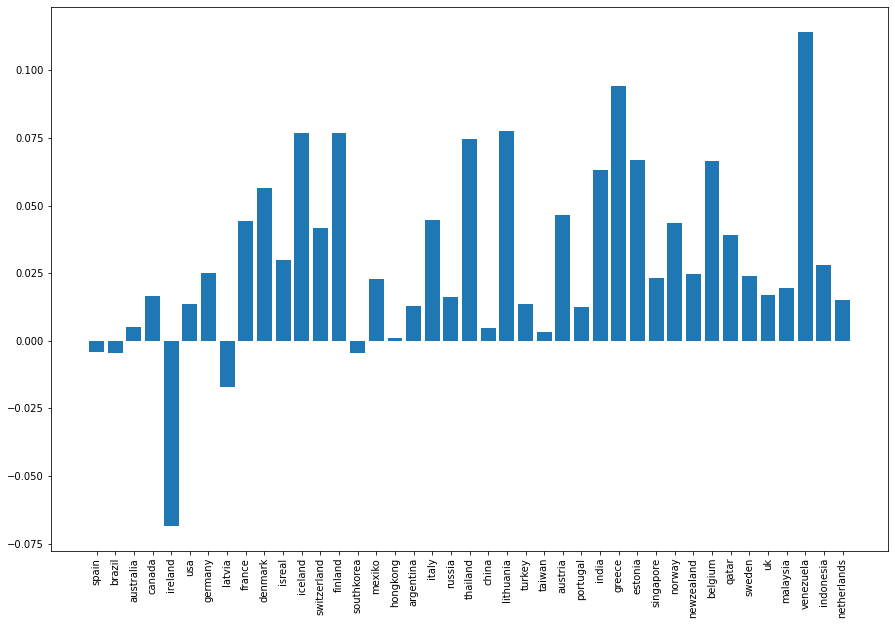

In [11]:
correlation_bar_chart("ma_trend50_200")